In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# cd sample_data

In [ ]:
# from google.colab import files
# upload = files.upload()

In [25]:
# data_set = pd.read_csv('glen.csv')
data_set = pd.read_csv("glen.csv", index_col=["name"])

In [42]:
df2 = data_set[data_set.columns[:-2]]
print(df2)

                       DWD  wd_description  overlay_parents
name                                                       
belief                2735            3216             1053
hoax                  1558            1189              468
doubt                 2731            3785             1053
claim_responsibility  1090             254             1811
creation               324            2927               79
...                    ...             ...              ...
health_service        4606            3775              802
disinfection          2129            3341             1299
tax_collecting        2110            4142              348
unloading              600            1249             1409
public_pollution      1107            4352             1725

[4709 rows x 3 columns]


In [44]:
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_encod = data_set
data_encod.DWD = le.fit_transform(data_encod.DWD)
# data_encod.name = le.fit_transform(data_encod.name)
data_encod.wd_description = le.fit_transform(data_encod.wd_description)
data_encod.overlay_parents = le.fit_transform(data_encod.overlay_parents)
# data_encod

X = data_encod[['DWD','wd_description', 'overlay_parents']].values
# y = data_encod.name.values

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
ct = ColumnTransformer(
                       [("imputer", SimpleImputer(missing_values=np.nan, strategy='median'), [2]),
                        ("one_hot", OneHotEncoder(categories='auto', sparse=False), slice(0, 1, 2))])

X = ct.fit_transform(X)
'''
# X = X[:,0:4]

'\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\n\ndata_encod = data_set\ndata_encod.DWD = le.fit_transform(data_encod.DWD)\n# data_encod.name = le.fit_transform(data_encod.name)\ndata_encod.wd_description = le.fit_transform(data_encod.wd_description)\ndata_encod.overlay_parents = le.fit_transform(data_encod.overlay_parents)\n# data_encod\n\nX = data_encod[[\'DWD\',\'wd_description\', \'overlay_parents\']].values\n# y = data_encod.name.values\n\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.impute import SimpleImputer\nct = ColumnTransformer(\n                       [("imputer", SimpleImputer(missing_values=np.nan, strategy=\'median\'), [2]),\n                        ("one_hot", OneHotEncoder(categories=\'auto\', sparse=False), slice(0, 1, 2))])\n\nX = ct.fit_transform(X)\n'

In [26]:
from kmodes.kmodes import KModes

In [47]:
# untrained_model=KModes(n_clusters=4, n_init=4)
# # data_tmp = data_set.iloc[:, :-1]
# clusters=untrained_model.fit_predict(df2)
# print(clusters)

[0 0 0 ... 0 0 0]


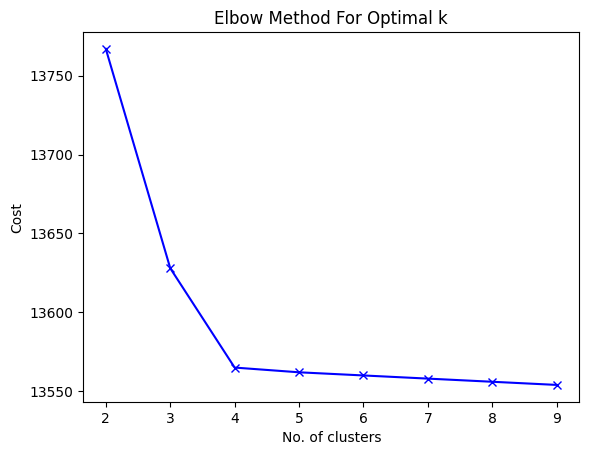

In [45]:
costs=[]
K=range(2, 10)
for k in K:
    untrained_model=KModes(n_clusters=k, n_init=4)
    trained_model=untrained_model.fit(df2)
    costs.append(trained_model.cost_)
plt.plot(K, costs, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()